The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

# **Impoting** **Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import BatchNormalization, Flatten, MaxPooling2D, Conv2D, Dense, Dropout
import cv2

Using TensorFlow backend.


# **Loading the train dataset** 

In [2]:
x_train = pd.read_csv('./sample_data/mnist_train_small.csv') 

In [3]:
x_train.shape


(19999, 785)

In [4]:
x_train.head() #to check top 5 rows of the dataset

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# defining x and y from the dataset
x = x_train.iloc[:, 1:785].values                 #features or pixels of X_train
y = x_train.iloc[:, 0].values                     #corresponding digit

In [6]:
print(x.shape)
print(y.shape)

(19999, 784)
(19999,)


# **Converting 784 flatten pixels into 28*28 images**

In [7]:
data = []                                         #empty list
for i in range(x.shape[0]):
  temp = x[i].reshape(28,28)
  data.append(temp)                               #adding temp values to the empty list

x_data = np.array(data)                           #converting list into a numpy array

In [8]:
x_data.shape

(19999, 28, 28)

# **Plotting some arbitrary images from the training dataset to visualize**

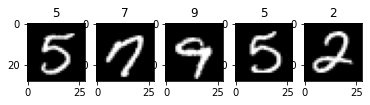

In [9]:
l = [34, 57, 19230, 6790, 456]

for i in range(1, len(l)+1):
  plt.subplot(1,5,i)
  plt.imshow(x_data[i-1], cmap = 'gray')
  plt.title(y[i-1])

In [10]:
train_x = x_data.reshape(-1, 28, 28, 1)
train_y = to_categorical(y) 

# **The training model**

In [11]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
 
adam = Adam(lr=.0001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 128)       512       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)        

# **Training the dataset with the model**

In [12]:
model.fit(train_x, train_y, epochs = 10, batch_size = 64)

Epoch 1/10
19999/19999 [==============================] - 9s 459us/step - loss: 0.5681 - accuracy: 0.8230
Epoch 2/10
19999/19999 [==============================] - 7s 365us/step - loss: 0.1570 - accuracy: 0.9527
Epoch 3/10
19999/19999 [==============================] - 7s 363us/step - loss: 0.1008 - accuracy: 0.9699
Epoch 4/10
19999/19999 [==============================] - 7s 363us/step - loss: 0.0759 - accuracy: 0.9763
Epoch 5/10
19999/19999 [==============================] - 7s 364us/step - loss: 0.0586 - accuracy: 0.9815
Epoch 6/10
19999/19999 [==============================] - 7s 365us/step - loss: 0.0474 - accuracy: 0.9854
Epoch 7/10
19999/19999 [==============================] - 7s 363us/step - loss: 0.0419 - accuracy: 0.9873
Epoch 8/10
19999/19999 [==============================] - 7s 364us/step - loss: 0.0345 - accuracy: 0.9892
Epoch 9/10
19999/19999 [==============================] - 7s 363us/step - loss: 0.0287 - accuracy: 0.9915
Epoch 10/10
19999/19999 [=====================

# **Test Data**

In [13]:
x_test = pd.read_csv('./sample_data/mnist_test.csv') 
x_test.shape

(9999, 785)

In [14]:
# defining X and Y from the dataset
X = x_test.iloc[:, 1:785].values
Y = x_test.iloc[:, 0].values

In [15]:
# converting 784 pixels of test data (9999 images)to 28*28 pixels
Data = []
for i in range(X.shape[0]):
  Temp = X[i].reshape(28,28)
  Data.append(Temp)

X_data = np.array(Data)

In [16]:
train_X = X.reshape(-1, 28, 28, 1)
train_Y = to_categorical(Y)

In [17]:
#prediction of test data 
y_pred = model.predict(train_X)

In [18]:
# metrics to measure the preformance of model for test data
metrics.r2_score(y_pred, train_Y)

0.9804689361446692

# **Plotting an arbitrary image from the test data to see result**

2

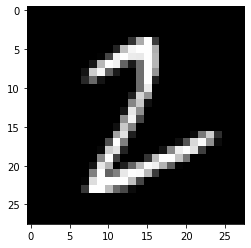

In [19]:
plt.imshow(X_data[37], cmap = 'gray')
np.argmax(y_pred[37])

# **Testing your own data**

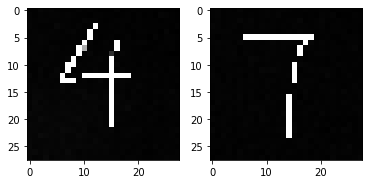

In [20]:
test1 = cv2.imread('./sample_data/four.png', 0)
test1 = cv2.resize(test1, (28,28))
plt.subplot(1, 2, 1)
plt.imshow(test1, cmap = 'gray')

test2 = cv2.imread('./sample_data/seven.png', 0)
test2 = cv2.resize(test2, (28,28))
plt.subplot(1, 2, 2)
plt.imshow(test2, cmap = 'gray')

# **Predict and plot the data to see the result clearly**

Text(0.5, 1.0, '7')

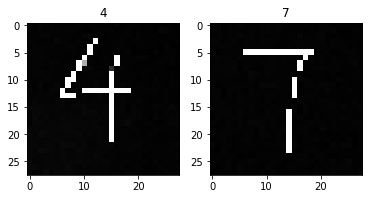

In [21]:
pred1 = model.predict(test1.reshape(1,28,28,1))
plt.subplot(1, 2, 1)
plt.imshow(test1, cmap = 'gray')
plt.title(np.argmax(pred1))

pred2 = model.predict(test2.reshape(1,28,28,1))
plt.subplot(1, 2, 2)
plt.imshow(test2, cmap = 'gray')
plt.title(np.argmax(pred2))